# Андан на экономе

## Семинар 8: доверительные интервалы

In [1]:
import numpy as np
import scipy.stats as sts

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid", palette="muted")

## 1. Ещё раз о квантилях

In [7]:
norm_rv = stats.norm(loc=0, scale=1)  # задали генератор
norm_rv.ppf(0.025) # нашли квантиль

NameError: name 'stats' is not defined

Число $-1.96$ это квантиль уровня $2.5\%$. Давайте нарисуем его на графике плотности.

(-1.959963984540054, 1.959963984540054)

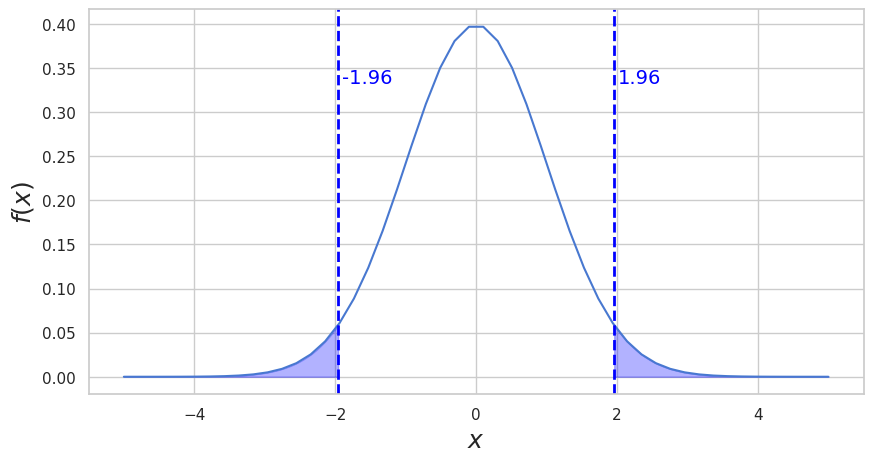

In [9]:
def norm_conf_int(alpha, mean_hat=0, std_hat=1, margin=5):
    """
        Строит 95% асимптотически-нормальный доверительный интервал
    """

    plt.figure(figsize=(10,5))
    xs = np.linspace(mean_hat - margin, mean_hat + margin)
    pdf = sts.norm(mean_hat, std_hat).pdf(xs)

    plt.plot(xs, pdf)
    plt.ylabel('$f(x)$', fontsize=18)
    plt.xlabel('$x$', fontsize=18)

    left, right = sts.norm.interval(1 - alpha, loc=mean_hat, scale=std_hat)

    for i in [left, right]:
        y_max = plt.ylim()[1]
        plt.axvline(i, color="blue", linestyle='dashed', lw=2)

        if i == left:
            xq = np.linspace(mean_hat - margin, left)
        else:
            xq = np.linspace(right, mean_hat + margin)

        text_margin = 0.05
        plt.text(i + text_margin, 0.8*y_max, round(i, 2), color="blue", fontsize=14)
        yq = sts.norm(mean_hat, std_hat).pdf(xq)
        plt.fill_between(xq, 0, yq, color='blue', alpha=0.3)

    return left, right

alpha = 0.05
norm_conf_int(0.05)

## 2. Мощь средних и асимптотические доверительные интервалы

__Ещё раз, ещё раз.__ Среднее хорошо тем, что есть ЦПТ, которая говорит нам, как оно распределено

$$
\bar x \overset{asy}{\sim} N \left(\mu, \frac{\sigma^2}{n}\right),
$$

На основе этого мы можем построить для среднего доверительный интервал.

## 2.1 Ульяна смотрит игру престолов

Ульяна любит сериалы! Конечно же, Игра Престолов не обошла её стороной. Она смотрит её каждый день. Пусть $X$ - число серий, которое Ульяна просмотрела за день. Так как число серий - счётчик, можно предположить, что $X \sim Poiss(\lambda)$, где $\lambda$ - интенсивность просмотра. Не забыли же ещё, что случайные величины счётчики можно (но не обязательно) моделировать с помощью распределения Пуассона?

Ульяне стало интересно с какой интенсивностью она смотрит сериалы, и теперь она хочет построить для $\lambda$ оценку методом моментов, а после доверительный интервал для неё.

In [4]:
# Ульяна рассказала о том, сколько серий посмотрела на этой неделе
x = [5, 7, 8, 2, 3, 1, 2]

$$
\hat \lambda = \bar x
$$

In [5]:
lam_hat = np.mean(x)
lam_hat

4.0

$$
\hat \lambda \overset{asy}{\sim} N \left(\lambda, \frac{\hat \lambda}{n} \right)
$$

$$
\hat \lambda \pm z_{1 - \frac{\alpha}{2}} \cdot \sqrt{\frac{\hat \lambda}{n}}
$$

In [15]:
norm_rv = sts.norm(loc=0, scale=1)

alpha = 0.05                       # задаём уровень значимости
z_alpha = norm_rv.ppf(1 - alpha/2) # из нормального распределения автоматически посчитался квантиль

lam_hat = np.mean(x)               # нашли оценку параметра
lam_se = np.sqrt(lam_hat/len(x))   # оценили стандартное отклонение

# по формулам посчитали границы
lam_left = lam_hat - z_alpha*lam_se
lam_right = lam_hat + z_alpha*lam_se

# Помимо самого интервала нас интересует его ширина
print(f"Доверительный интервал [{lam_left:.3}, {lam_right:.3}] ширины { lam_right - lam_left:.3}")

Доверительный интервал [2.52, 5.48] ширины 2.96


По аналогии можно построить асимптотический доверительный интервал с помощью уже готовой функции. Единственное, что от нас потребуется: вычислить среднее и дисперсию.

In [14]:
lam_hat = np.mean(x)             # нашли оценку параметра
lam_se = np.sqrt(lam_hat/len(x)) # оценили стандартное отклонение

sts.norm.interval(0.95, loc=lam_hat, scale=lam_se)

(2.518406490932507, 5.481593509067493)

Можно построить этот же доверительный интервал на картинке с помощью функции, которую мы написали в самом начале тетрадки.

(2.518406490932507, 5.481593509067493)

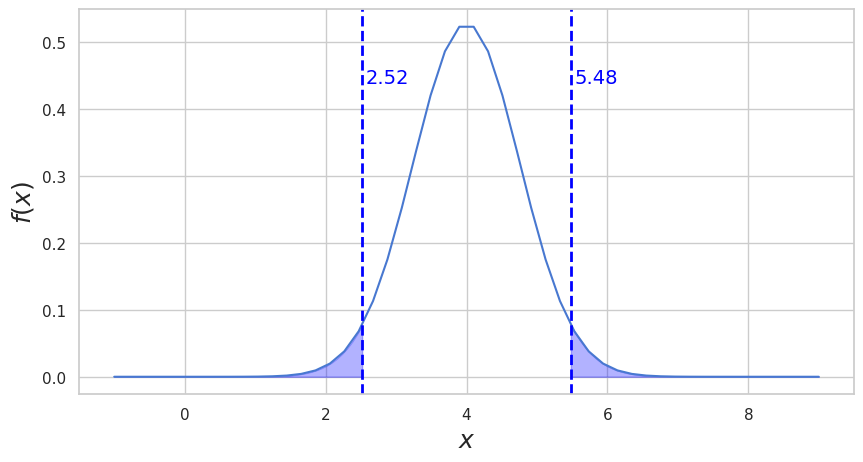

In [16]:
alpha = 0.05
norm_conf_int(alpha, mean_hat=lam_hat, std_hat=lam_se)

## 2.2  Подруга Ульяны

Теперь Таня и Ульяна смотрят сериалы вдвоём. Каждая со своей интенсивностью $\lambda_i$.

Ульяна считает, что она опережает Таню по интенсивности просмотра. Нужно построить доверительный интервал для разности $\lambda_1 - \lambda_2$ и понять, правда ли, что Ульяна впереди. Для простоты будем считать, что Ульяна и Таня смотрят сериалы независимо друг от друга.

In [17]:
x = [5, 7, 8, 2, 3, 1, 2]  # Ульяна
y = [1, 1, 9, 1, 2, 2, 2]  # Таня

$$
\hat \lambda_1 - \hat \lambda_2 \overset{asy}{\sim} N \left( \lambda_1 - \lambda_2, \frac{\hat \lambda_1}{n_1} + \frac{\hat \lambda_2}{n_2} \right).
$$

$$
\hat{\lambda}_1 - \hat{\lambda}_2 \pm z_{1-\frac{\alpha}{2}}\sqrt{\frac{\hat{\lambda}_1}{n_1} + \frac{\hat{\lambda}_2}{n_2}}
$$

In [18]:
alpha = 0.05 # задаём уровень значимости

z_alpha = norm_rv.ppf(1 - alpha/2) # квантиль для нормального

diff = np.mean(x) - np.mean(y)
diff_se = np.sqrt(np.mean(x)/len(x) + np.mean(y)/len(y))

left = diff - z_alpha*diff_se
right = diff + z_alpha*diff_se

# Помимо самого интервала нас интересует его ширина
print(f"Доверительный интервал [{left:.3}, {right:.3}] ширины {right - left:.3}")

Доверительный интервал [-0.47, 3.33] ширины 3.8


Доверительный интервал покрывает ноль. Это означает, что Ульяна и Таня смотрят сериал с одинаковой интенсивностью.

Угадайте как часто мы сделаем ошибку, утверждая это? Правильно! В $5\%$ случаев.

Фактически мы с вами только что проверили на уровне значимости $5\%$ гипотезу о равенстве средних. Зафиксируйте это в голове и вспомните, когда мы чётко и по шагам формализуем процедуру проверки гипотез.

(-0.47044607117023984, 3.3275889283130966)

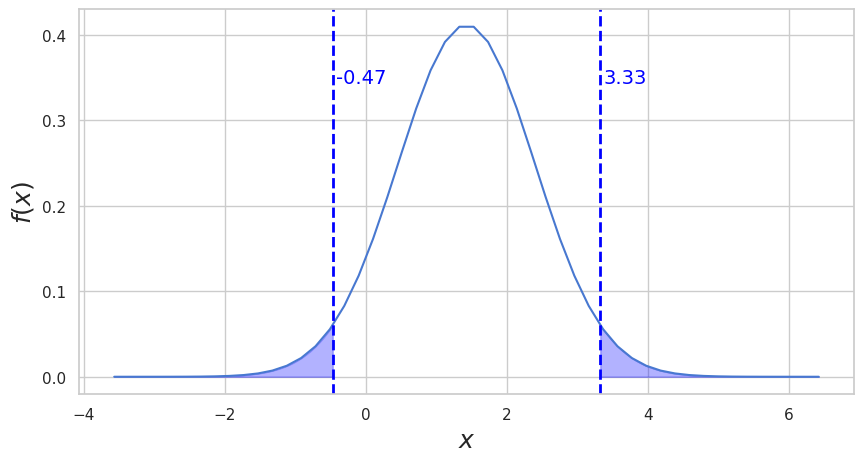

In [19]:
norm_conf_int(alpha, mean_hat=diff, std_hat=diff_se)

### Упражнение  (шахтёры)

На угольных шахтах ежегодно происходят аварии. Англия довольно давно собирает информацию о числе крупных аварий. Именно её нам предстоит проанализировать:

* хочется понять как часто в среднем происходят аварии
* насколько большой у среднего числа аварий доверительный интервал

In [24]:
import pandas as pd

url = "https://raw.githubusercontent.com/FUlyankin/matstat-AB/main/week06_matstat_sh/data/coals.csv"
df = pd.read_csv(url, index_col=0)
print(df.shape[0])
df.head()

112


,year,count
1,1851,4
2,1852,5
3,1853,4
4,1854,1
5,1855,0


В колонке `year` находится год наблюдений. В колонке `count` число аварий за этот год на шахтах в Англии. Посмотрим на распределение числа аварий.

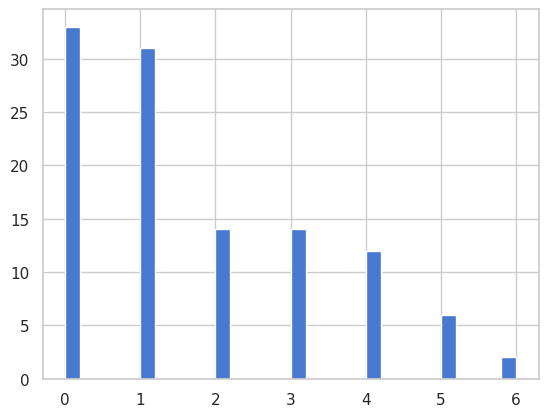

In [21]:
df['count'].hist(bins=30);

Судя по гистограмме уместно предположить, что число аварий имеет распределение Пуассона, $Poiss(\lambda)$.  То есть, если мы хотим что-то понять про среднее число аварий, нам надо оценить параметр $\lambda$.

__а)__ Найдите оценку параметра $\lambda$ с помощью метода моментов. Запишите получившийся результат в переменную `lambda_hat`.

In [23]:
lambda_hat = df['count'].mean()
lambda_hat

1.7053571428571428

__б)__ Среднее, оценённое методом моментов будет иметь асимптотически нормальное распределение. Оцените стандартное отклонение этого распределения по выборке и запишите ответ в переменную `lam_se`.

> __Примечание:__ мы предполагаем, что выборка пришла из распределения Пуассона. Для него $Var(X) = \lambda$. Для оценки стандартного отклонения используйте этот факт. Конечно же вы можете оценить его через функцию `std`, в плане асимптотики результат получится одинаковый.

In [25]:
lam_se = np.sqrt(lambda_hat / df.shape[0])
lam_se

0.1233953121525469

$$
\hat \lambda \overset{asy}{\sim} N \left( \lambda, \frac{1.705}{112} \right)
$$

__в)__ Постройте для неизвестного математического ожидания $\lambda$ доверительный интервал. Возьмите уровень значимости равный $10\%$. В переменные `left` и `right` запишите соотвествующие границы интервала. В переменную `delta` запишите его ширину.

In [29]:
alpha = 0.01
z = sts.norm().ppf(1 - alpha/2)

left = lambda_hat - z * lam_se
right = lambda_hat + z * lam_se
delta = right - left
print(left, right)

1.3875118818940488 2.0232024038202367


__г)__  Многие говорят, что в $20$ веке катастроф стало на порядок меньше. Давайте проверим это. Постройте оценку для $\lambda_1$ по данным до $1900$ года включительно. Постройте оценку для $\lambda_2$ по данным после $1900$ года. Для разности $\lambda_1 - \lambda_2$ постройте $95\%$ доверительный интервал.

__Модель:__

- $X_1, \ldots, X_n \sim iid \, \text{Poiss}(\lambda_1)$
- $Y_1, \ldots, Y_m \sim iid \, \text{Poiss}(\lambda_2)$
- У нас много данных ($n$, $m$ большие)
- Выборки X и Y не зависят друг от друга

Оцениваем доверительный интервал для разности $\lambda_2 - \lambda_1$. Если ноль внутри, значит распределение катастроф никак не поменялось.



In [37]:
alpha = 0.001
z = sts.norm().ppf(1 - alpha/2)

y = df[df['year'] > 1900]['count'].values
x = df[df['year'] <= 1900]['count'].values

diff = y.mean() - x.mean()
diff_se = np.sqrt(y.mean()/len(y) + x.mean()/len(x))

diff - z * diff_se, diff + z * diff_se

(-2.6584158068486743, -0.9351325802481)

Ноль не вошёл в этот доверительный интервал. Это означает, что на уровне значимости $5\%$ мы можем сказать, что число аварий правда снизилось.

In [38]:
x.mean(), x.var()

(2.7, 2.8899999999999992)

In [39]:
y.mean(), y.var()

(0.9032258064516129, 1.0874089490114462)

__д) Вероятность для распределения Пуассона__

Вспомните формулу, по которой считается вероятность того, что Пуассоновская случайная величина примет какое-то значение. Найдите точечную оценку вероятности того, что произойдёт только одна авария. В качестве $\lambda$ используйте оценку метода моментов, полученную в первом задании.

$$
\mathbb{P}(X = k) = \frac{\lambda^k \cdot e^{-\lambda}}{k!}
$$

In [43]:
import math

def poiss_prob(k, lam=lambda_hat):
    return lam * np.exp(-lam) * 1/math.factorial(k)

In [46]:
for i in range(10):
    print(i, poiss_prob(i))

0 0.3098761473208731
1 0.3098761473208731
2 0.15493807366043655
3 0.05164602455347885
4 0.012911506138369713
5 0.0025823012276739426
6 0.0004303835379456571
7 6.14833625636653e-05
8 7.685420320458162e-06
9 8.539355911620181e-07


In [47]:
# проверка,функции
assert np.abs(poiss_prob(1) - 0.3098761) < 1e-5

__е) Дельта-метод__

__Т. (Дельта-метод)__

Если дисперсия не очень большая, тогда:

$$
X \overset{asy}{\sim} N(\mu, \sigma^2), \quad g(t) \Rightarrow g(X) \overset{asy}{\sim} N(g(\mu), g'(\mu)^2 \cdot \sigma^2)
$$

Та вероятность, которую мы нашли в предыдущем пункте - это лишь точечная оценка. Она является функцией от среднего. С помощью дельта-метода постройте для этой вероятности $95\%$ довертельный интервал.

$$
\hat{\mathbb{P}}(X = k) = \frac{\bar x^k \cdot e^{-\bar x}}{k!}
$$

$$
\bar x \overset{asy}{\sim} N \left(\lambda,\frac{\bar x}{n} \right)
$$

$$
g(t) = t^k exp(-t) \cdot 1/k!
$$

$$
g'(t) = 1/k! \cdot((k-1) \cdot t^{k-1} \cdot exp(-t) - t^k \cdot exp(-t))
$$

$$
\hat{\mathbb{P}}(X = k) \overset{asy}{\sim} N \left(g(\lambda),\frac{\bar x}{n} \cdot [g'(\bar x)]^2 \right)
$$

In [48]:
def g(t, k=1):
  return 1/math.factorial(k) * t**k * np.exp(-t)

def dg_dt(t, k=1):
  return 1/math.factorial(k) * ((k - 1) * t ** (k-1) * np.exp(-t) - t ** k * np.exp(-t))

По аналогии можно построить доверительные интервалы для вероятности того, что случайная величина примет значения от нуля до девяти. Проделайте это в качестве необязательного упражнения и оформите процедуру расчёта в виде функции.

In [51]:
def prob_ci(k, alpha = 0.01, lam_hat=lam_hat, n=112):
    p = g(lam_hat, k)
    p_std = np.sqrt(lam_hat/n * dg_dt(lam_hat, k) ** 2)
    z = sts.norm().ppf(1 - alpha/2)
    return p - z*p_std, p + z*p_std


Сделали функцию? Запускайте код для не очень информативной картинки!

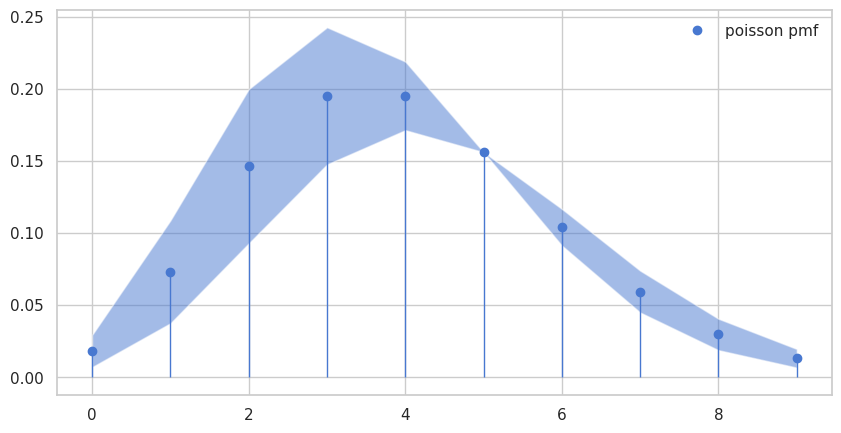

In [59]:
poiss_rv = sts.poisson(lam_hat)

p = poiss_rv.pmf(x)
left, right = np.array([prob_ci(x) for x in np.arange(10)]).T

plt.figure(figsize=(10,5))
plt.plot(x, p, 'bo', ms=6, label='poisson pmf')
plt.fill_between(x, left, right, alpha=0.5)
plt.vlines(x, 0, p, lw=1)
plt.legend(loc='best', frameon=False)
plt.show()

In [60]:
for k,(i,j) in enumerate(zip(left, right)):
    print(f"Вероятность P(X={k}) лежит между  {i:.5} и {j:.5}")

Вероятность P(X=0) лежит между  0.0071709 и 0.02946
Вероятность P(X=1) лежит между  0.037599 и 0.10893
Вероятность P(X=2) лежит между  0.09303 и 0.20002
Вероятность P(X=3) лежит между  0.14782 и 0.24292
Вероятность P(X=4) лежит между  0.17159 и 0.21914
Вероятность P(X=5) лежит между  0.15629 и 0.15629
Вероятность P(X=6) лежит между  0.091515 и 0.11688
Вероятность P(X=7) лежит между  0.045049 и 0.074032
Вероятность P(X=8) лежит между  0.018901 и 0.040639
Вероятность P(X=9) лежит между  0.0067904 и 0.019672


Интервалы получился довольно короткими. Попробуйте поиграться с уровнем значимости и посмотреть как они меняются в зависимости от него.

В этой терадке нам осталось обсудить последний нюанс. Мы из теории вероятностей знаем, что для случайной величины $X$, имеющей распределение Пуассона $\mathbb{E}(X) = Var(X) = \lambda$. Для текущей выборки мы видим, что между дисперсией и средним есть небольшое отличие.

In [61]:
df['count'].mean()

1.7053571428571428

In [62]:
df['count'].var()

2.7142052767052722

Не факт, что мы имеем право предполагать, что наша выборка пришла к нам из распределения Пуассона. Все предпосылки о распределениях выборки нужно тестировать. Позже мы научимся это делать.